In [24]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib as plt

In [2]:
print(cp.__version__)

1.2.1


# Create Datasets

In [3]:
train_val_df = pd.read_csv('train.csv', header = None)
display(train_val_df)
train = train_val_df[:4000].to_numpy()
X_train = train[:,1:]
Y_train = train[:,0]
Y_train[np.where(Y_train == 0)] = -1 # negative label 0 to -1
print('features_train.shape: ',X_train.shape)
print('labels_train.shape: ',Y_train.shape)

validation = train_val_df[4001:].to_numpy()
X_val = validation[:,1:]
Y_val = validation[:,0]
Y_val[np.where(Y_val == 0)] = -1 # negative label 0 to -1
print('features_val.shape: ',X_val.shape)
print('labels_val.shape: ',Y_val.shape)

test_df = pd.read_csv('test.csv',header = None)
test = test_df.to_numpy()
X_test = test[:,1:]
Y_test = test[:,0]
Y_test[np.where(Y_test == 0)] = -1 # negative label 0 to -1
print('features_test.shape: ',X_test.shape)
print('labels_test.shape: ',Y_test.shape)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,-0.36,-0.91,-0.99,-0.57,-1.38,-1.54,-1.64,1.29,0.65,...,1.15,-0.05,-0.09,0.02,1.75,1.58,0.12,0.30,2.44,-1.26
1,1.0,-1.40,-1.90,0.09,0.29,-0.30,-1.30,1.13,-2.38,-1.16,...,0.48,0.24,-0.16,-0.48,-0.02,-0.35,-0.27,-0.20,-0.92,-0.46
2,1.0,-0.43,1.45,-0.68,-1.58,0.32,-0.14,0.23,-1.01,-0.39,...,-0.94,0.11,-1.30,-0.24,0.74,0.88,1.37,0.12,0.01,-0.56
3,1.0,-0.76,0.30,-0.57,-0.33,-1.50,1.84,1.37,0.23,0.66,...,-0.42,0.06,-1.05,0.35,-0.24,-0.69,1.31,-0.18,-1.54,-1.70
4,0.0,-0.76,1.36,0.00,-1.44,-1.27,-0.76,-1.42,-0.58,0.11,...,-0.44,1.45,-1.18,-1.13,-0.14,0.04,0.33,1.20,-0.81,-1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1.0,-1.55,-0.02,0.67,0.17,-2.17,-2.96,-0.52,0.58,-0.26,...,1.09,1.37,0.44,-0.97,-0.65,0.16,-2.17,0.39,-2.48,0.36
8496,0.0,0.53,-0.74,0.06,-0.76,0.20,0.02,0.75,1.53,0.34,...,-0.95,0.97,0.25,-0.93,-0.60,-0.64,0.03,-1.04,0.01,-1.04
8497,1.0,1.18,0.78,-0.02,1.25,-0.85,-0.50,1.19,-0.73,0.33,...,1.44,-1.57,-0.08,0.55,1.06,0.36,-0.40,-0.63,0.29,-0.96
8498,1.0,-0.55,1.16,-0.56,1.58,-0.06,-1.38,0.94,-0.14,0.47,...,0.11,-0.42,-0.81,-0.04,-0.11,0.42,-0.30,2.97,-2.66,-1.90


features_train.shape:  (4000, 200)
labels_train.shape:  (4000,)
features_val.shape:  (4499, 200)
labels_val.shape:  (4499,)
features_test.shape:  (1500, 200)
labels_test.shape:  (1500,)


In [4]:
print(X_train) #just double check 

[[-0.36 -0.91 -0.99 ...  0.3   2.44 -1.26]
 [-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 ...
 [-0.57  0.14 -0.62 ...  0.    0.38 -0.82]
 [ 0.4   0.16 -0.49 ...  0.89  0.21  1.09]
 [ 0.86 -0.23 -2.01 ...  0.21  0.68  2.49]]


In [5]:
print(X_train[0])

[-0.36 -0.91 -0.99 -0.57 -1.38 -1.54 -1.64  1.29  0.65 -0.75  1.11 -0.04
  1.86  0.76 -0.67  0.75  0.07  0.31  1.23 -0.7  -0.31 -1.48  0.11 -1.18
  0.78  0.48  0.85  2.11 -1.45  0.74 -0.54  1.31  0.64 -1.42  1.22 -1.35
  0.4  -0.72 -0.79  0.8   0.32 -0.76  0.22  2.59 -0.64  1.27  0.66  1.8
  0.77  1.13 -1.69 -1.31  1.66 -0.26 -0.17 -0.41 -0.8   1.24 -1.51 -1.45
 -1.07 -1.38 -0.92 -1.26 -2.02  0.58 -0.58 -1.06 -0.05  0.29 -1.72 -0.26
 -1.67 -0.07  0.81  0.01 -0.22  1.72  0.43  0.92 -0.68 -0.98 -1.12 -0.81
 -0.79  1.72 -1.33 -1.08 -1.37 -1.75 -0.9  -0.76 -1.33  0.37  0.25  0.24
  0.33 -0.72 -1.05 -0.47 -0.44 -0.89  0.01 -1.29 -1.79 -0.39 -1.03  0.29
  1.2   0.62 -0.19 -1.3  -0.29  2.5   2.01  0.75 -0.53  1.61 -1.62 -0.33
 -0.93 -0.79  0.89 -0.64  0.13  0.97  0.37  0.22  0.97 -0.29  1.5  -0.42
  0.62  1.43  0.55 -1.23 -1.83  2.13 -0.06  0.76  0.63  0.58  1.92  0.03
  0.69  0.6   1.18  0.54  0.03 -2.2   1.85 -0.78  2.04 -0.82 -0.14 -1.3
  0.84  0.63 -0.44 -1.79  0.16  1.34  0.57 -1.01  1.1

# Primal

In [6]:
class svm_model:
    def __init__(self,W,b,loss = None,A = None):
        self.W = W
        self.b = b
        self.Psi = loss
        self.Alpha = A
        return

In [7]:
def svm_predict_primal(data_test, label_test, svm_model):
    W = svm_model.W
    b = svm_model.b
    X = data_test
    y = label_test
    
    total = data_test.shape[0]
    
    res = np.multiply(X @ W + b, y)
    correct = len(np.where(res > 1e-4)[0]) #label*res to check whether they are the same sign
    acc = correct/total
    return acc

In [25]:
def svm_train_primal(data_train, label_train, regularisation_para_C):
    X_train = data_train
    Y_train = label_train
    
    m,n = X_train.shape #m: number of samples, n: number of features
    W = cp.Variable(n) # w: n*1
    Psi = cp.Variable(m) # Psi: m*1, hinge loss, slack variable
    b = cp.Variable() # b is a scalar parameter
    C = regularisation_para_C # Hyper-parameter, control softness trade-off of the margin

    # Objective in primal problem: 
    objective = cp.Minimize(0.5 * cp.sum_squares(cp.norm(W)) + (C/m) * cp.sum(Psi)) ####c/n

    # Constraints in primal problem:
    constraints = [cp.multiply(Y_train,X_train @ W + b) -1 + Psi >= 0, Psi >= 0]

    # Solve constrained convex optimization
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    # Show results
    print('Status: ', prob.status)
    #print('W*: ', W.value)
    print('The sum of W*: ', np.sum(W.value))
    print('b*:            ', b.value,'\n')
    
    # Create svm prime model:
    prime_model = svm_model(W.value,b.value,loss = Psi.value)
    return prime_model


# The I/O format requested in the assignment description
prime_model = svm_train_primal(X_train, Y_train, 100)
test_accuracy = svm_predict_primal(X_test,Y_test,prime_model)
print(f'Accuracy on the test set: {test_accuracy*100}%')

Status:  optimal
The sum of W*:  -0.1452156803361282
b*:             1.779813717087077 

Accuracy on the test set: 96.8%


# Dual

In [9]:
def svm_train_dual(data_train, label_train, regularisation_para_C):
    X_train = data_train
    Y_train = label_train
    C = regularisation_para_C
    
    m,n = X_train.shape #m: number of samples, n: number of features
    Alpha = cp.Variable(m) # Alpha: size m, Lagrange multiplier
    
    # Objective in dual problem:
    dual_objective = cp.Maximize(cp.sum(Alpha) - 0.5*cp.sum_squares(cp.multiply(Alpha,Y_train) @ X_train))
    
    
    #Constraints in dual problem:
    dual_constraints = [Alpha >= 0, Alpha <= (C/m), Alpha.T @ Y_train == 0] ##c/sample num
    
    # Solve constrained convex optimization
    dual_prob = cp.Problem(dual_objective, dual_constraints)
    # dual_prob.solve(verbose=True)
    
    #solvers will fail when the numerical data is very large or very small, which can lead to what's known as poorly conditioned problem data
    dual_prob.solve(solver=cp.ECOS) #using the ECOS solver solved the OSQP Error


    # Show results
    print('Status: ', dual_prob.status)
    print('The sum of Alpha*: ', np.sum(Alpha.value))

    # Calculate W* and b* from dual problem
    dual_W = X_train.T @ np.multiply(Alpha.value,Y_train)
    dual_b = np.mean(Y_train - X_train @ dual_W)
    print('The sum of dual W*: ', np.sum(dual_W))
    print('Dual b*:            ', dual_b,'\n')

    
    # Create svm dual model:
    dual_model = svm_model(dual_W,dual_b,loss = None,A = Alpha.value)
    return dual_model



# The I/O format requested in the assignment description
dual_model = svm_train_dual(X_train, Y_train, 100)

# The 'svm_predict_primal()' below works for dual derived W and b as well. 
#The name of this function is fixed in the assignment requirement,
#so I couldn't change it, even though it's an ambiguious name
test_accuracy = svm_predict_primal(X_test,Y_test,dual_model) 

print(f'Accuracy on the test set: {test_accuracy*100}%')

Status:  optimal
The sum of Alpha*:  7.28163240568506
The sum of dual W*:  -0.1452157032864848
Dual b*:             1.7942996486309701 

Accuracy on the test set: 96.8%


# Support Vectors Primal Problem

In [10]:
# Soft-Margin Support Vectors must satisfy: yi(W^*T @ Xi + b) = 1 - Psi

#get the values from prime model
W = prime_model.W
b = prime_model.b
Psi = prime_model.Psi

prime_sv_idx = []
for i in range(X_train.shape[0]): #iterate through each sample
    X_i = X_train[i]
    y_i = Y_train[i]
    loss_i = Psi[i]
        
    res = y_i * (X_i @ W + b) -1 + loss_i
    # to solve the precision problem, changed '== 0'  to a range around +-1e-4
    if res < 1e-4 and res > -1e-4:  
        prime_sv_idx.append(i)

prime_sv = X_train[prime_sv_idx]
print(f'There are {len(prime_sv_idx)} support vectors:\n')
print(prime_sv,'\n')
print(f'The index of support vectors in prime: \n {prime_sv_idx}')

There are 392 support vectors:

[[-0.36 -0.91 -0.99 ...  0.3   2.44 -1.26]
 [ 1.05 -1.79  0.9  ...  0.39  0.6  -1.66]
 [ 1.01 -1.13  1.49 ...  0.23 -0.3  -0.01]
 ...
 [ 2.16 -0.78 -0.78 ... -0.38  1.1   0.39]
 [ 0.36 -0.19 -1.06 ... -0.83 -0.2   0.12]
 [-0.73 -1.19 -0.24 ...  1.46 -1.36  1.21]] 

The index of support vectors in prime: 
 [0, 16, 28, 29, 41, 54, 58, 68, 80, 88, 127, 130, 140, 145, 147, 150, 199, 208, 239, 253, 263, 266, 275, 281, 284, 296, 305, 307, 332, 344, 356, 377, 395, 401, 403, 405, 414, 420, 424, 432, 433, 441, 446, 450, 473, 479, 495, 510, 521, 525, 532, 547, 561, 563, 564, 567, 576, 581, 587, 595, 604, 610, 637, 642, 656, 660, 678, 703, 708, 709, 725, 736, 737, 752, 768, 774, 796, 799, 809, 816, 821, 826, 834, 843, 844, 856, 861, 873, 905, 909, 932, 935, 948, 965, 967, 988, 989, 993, 1003, 1017, 1022, 1050, 1082, 1098, 1116, 1123, 1139, 1142, 1166, 1167, 1178, 1179, 1188, 1219, 1242, 1266, 1274, 1295, 1304, 1320, 1364, 1371, 1374, 1377, 1403, 1406, 1407, 1414, 1

# Support Vectors Dual Problem

In [21]:
# In dual problem, only the samples that associated with a positive Lagranian coefficient 
# (i.e. Alpha[i] > 0) can have effect on the decision boundary. These samples are the support vectors.

Alpha = dual_model.Alpha

dual_sv_idx = []
for i in range(X_train.shape[0]):
    if Alpha[i] > 1e-4:
        dual_sv_idx.append(i)

dual_sv = X_train[dual_sv_idx]
print(f'There are {len(dual_sv_idx)} support vectors:\n')
print(dual_sv,'\n')
print(f'The index of support vectors in dual: \n {dual_sv_idx}')

There are 392 support vectors:

[[-0.36 -0.91 -0.99 ...  0.3   2.44 -1.26]
 [ 1.05 -1.79  0.9  ...  0.39  0.6  -1.66]
 [ 1.01 -1.13  1.49 ...  0.23 -0.3  -0.01]
 ...
 [ 2.16 -0.78 -0.78 ... -0.38  1.1   0.39]
 [ 0.36 -0.19 -1.06 ... -0.83 -0.2   0.12]
 [-0.73 -1.19 -0.24 ...  1.46 -1.36  1.21]] 

The index of support vectors in dual: 
 [0, 16, 28, 29, 41, 54, 58, 68, 80, 88, 127, 130, 140, 145, 147, 150, 199, 208, 239, 253, 263, 266, 275, 281, 284, 296, 305, 307, 332, 344, 356, 377, 395, 401, 403, 405, 414, 420, 424, 432, 433, 441, 446, 450, 473, 479, 495, 510, 521, 525, 532, 547, 561, 563, 564, 567, 576, 581, 587, 595, 604, 610, 637, 642, 656, 660, 678, 703, 708, 709, 725, 736, 737, 752, 768, 774, 796, 799, 809, 816, 821, 826, 834, 843, 844, 856, 861, 873, 905, 909, 932, 935, 948, 965, 967, 988, 989, 993, 1003, 1017, 1022, 1050, 1082, 1098, 1116, 1123, 1139, 1142, 1166, 1167, 1178, 1179, 1188, 1219, 1242, 1266, 1274, 1295, 1304, 1320, 1364, 1371, 1374, 1377, 1403, 1406, 1407, 1414, 14

# Q5. Hyper-parameter 'C' Tuning Utilizing Validation Set

d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Status:  optimal_inaccurate
The sum of W*:  0.00025768720168650424
b*:             0.3975700168285553 

C = 2^(-10) validation accuracy: 49.09979995554568%
--------------------------------------------
Status:  optimal
The sum of W*:  0.001018431458808717
b*:             0.9491146973216334 

C = 2^(-8) validation accuracy: 49.09979995554568%
--------------------------------------------
Status:  optimal
The sum of W*:  0.004074508427878487
b*:             0.7964686784653918 

C = 2^(-6) validation accuracy: 49.09979995554568%
--------------------------------------------
Status:  optimal
The sum of W*:  0.009485958765916944
b*:             0.33673963217431 

C = 2^(-4) validation accuracy: 92.44276505890198%
--------------------------------------------
Status:  optimal
The sum of W*:  -0.01876808041378697
b*:             0.50062747239116 

C = 2^(-2) validation accuracy: 96.22138252945099%
--------------------------------------------
Status:  optimal
The sum of W*:  -0.08009345876340557
b

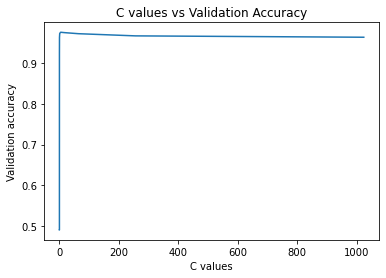

Test set performance:
Status:  optimal
The sum of W*:  -0.09799142609364914
b*:             0.9130704080137506 

C = 2^(2) gives accuracy: 97.46666666666667% on the test set.


In [26]:
import matplotlib.pyplot as plt

# Create hyper-parameter search space c = [2^-10, 2^-8, ...,2^8, 2^10]
expo = np.linspace(-10,10,num = 11)
C_lst = [2**(ex) for ex in expo]
str_lst = ['2^('+str(int(ex))+')' for ex in expo]
C_dict = dict(zip(str_lst,C_lst))

#initializing
best_score = 0
best_C_idx = 0
acc_lst = []
#find best C on validation set
for i,(C_str,C) in enumerate(C_dict.items()):
    p_model = svm_train_primal(X_train, Y_train, C) #create svm model for new C
    val_accuracy = svm_predict_primal(X_val,Y_val,p_model)
    print(f'C = {C_str} validation accuracy: {val_accuracy*100}%')
    acc_lst.append(val_accuracy)
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_C_idx = i #keep the best one
    print('--------------------------------------------')
        
print('Best C is ',str_lst[best_C_idx], f', which  gives {best_score*100}% accuracy.\n')
plt.plot(C_lst,acc_lst)
plt.xlabel('C values')
plt.ylabel('Validation accuracy')
plt.title('C values vs Validation Accuracy')
plt.show()

# Optimal C performance on the test set
print('Test set performance:')
test_model = svm_train_primal(X_train, Y_train, C_lst[best_C_idx])
test_accuracy = svm_predict_primal(X_test,Y_test,test_model)
print(f'C = {str_lst[best_C_idx]} gives accuracy: {test_accuracy*100}% on the test set.')

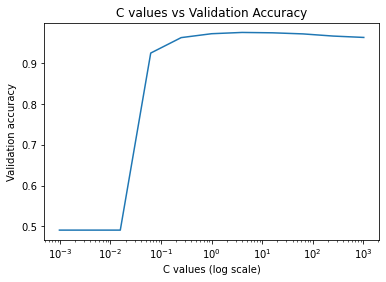

In [27]:
plt.plot(C_lst,acc_lst)
plt.xlabel('C values (log scale)')
plt.ylabel('Validation accuracy')
plt.xscale("log")
plt.title('C values vs Validation Accuracy')
plt.show()

# Q6. Sklearn SVM

In [19]:
import sklearn
print(sklearn.__version__)

0.24.2


In [23]:
from sklearn import svm

# Using the best C in Q5
clf = svm.LinearSVC(C = C_lst[best_C_idx]/X_train.shape[0])
clf.fit(X_train, Y_train)
score = clf.score(X_test,Y_test)
print(f'Test accuracy: {score*100}%')
print('sum of W*: ',np.sum(clf.coef_))
print('b*:        ',clf.intercept_[0])

Test accuracy: 96.66666666666667%
sum of W*:  -0.03860344484587469
b*:  0.29306619973990966


In [29]:
# The search grid for C needs to be divided by the sample number
[ele/X_train.shape[0] for ele in C_lst]

[2.44140625e-07,
 9.765625e-07,
 3.90625e-06,
 1.5625e-05,
 6.25e-05,
 0.00025,
 0.001,
 0.004,
 0.016,
 0.064,
 0.256]

In [40]:
#Check whether the labels are balanced
train_unique, train_counts = np.unique(Y_train, return_counts=True)
val_unique, val_counts = np.unique(Y_val, return_counts=True)

train_dict = dict(zip(train_unique, train_counts))
val_dict = dict(zip(val_unique, val_counts))

print(f'Training set labels distribution: {train_dict}, pos:neg = {train_dict[1.0]/train_dict[-1.0]}\n')
print(f'Validation set labels distribution: {val_dict}, pos:neg = {val_dict[1.0]/val_dict[-1.0]}\n')

Training set labels distribution: {-1.0: 1958, 1.0: 2042}, pos:neg = 1.0429009193054137

Validation set labels distribution: {-1.0: 2290, 1.0: 2209}, pos:neg = 0.9646288209606987



This is not bad

### Grid Search find C

In [43]:
# Using the grid search to find optimal C for SKlearn model
from sklearn.model_selection import GridSearchCV

C_grid_lst = [ele/X_train.shape[0] for ele in C_lst]
# Create the parameter grid based on the results of random search
param_grid = {
    'C': C_grid_lst,
}


# Create a based model
clf = svm.LinearSVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'accuracy',
                          cv = 5, n_jobs = -1, verbose = 2) #to be consistent as last qustion, using accuracy as the metric
grid_search.fit(X_val, Y_val)

print(f'Best Para in Sklearn model: {grid_search.best_params_}, the corresponding C in last qustion: {list(grid_search.best_params_.values())[0]*X_train.shape[0]}\n')

#creat svm model using optimal paras
svm_star = svm.LinearSVC(C=grid_search.best_params_['C'])
#t fit train set
svm_star.fit(X_train, Y_train)

# Performance
score = svm_star.score(X_test,Y_test)
print(f'Test accuracy: {score*100}%')
print('sum of W*: ',np.sum(svm_star.coef_))
print('b*:        ',svm_star.intercept_[0])

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Para in Sklearn model: {'C': 0.004}, the corresponding C in last qustion: 16.0

Test accuracy: 96.8%
sum of W*:  -0.08312181246869857
b*:         0.5394102610170345


The best parameter of C is slightly different from last question, because Q5 is trained on traing set and find the C that yields the highest accuracy on the validation set. This Q6 is using 5 folds cross validation to find the best C using the validation set only. Different dataset may lead to a slightly different result.

In [45]:
print(f'Val + Train set labels distribution: {val_dict}, pos:neg = {(train_dict[1.0] + val_dict[1.0])/(train_dict[-1.0] + val_dict[-1.0])}\n')

Val + Train set labels distribution: {-1.0: 2290, 1.0: 2209}, pos:neg = 1.0007062146892656



In Q5, we used both of the training set and validation set, if we use both of them, as shown in the distribution result above, pos samples and the neg samples are well distributed compared to only using one set only. Therefore, using validation set only is slightly unbalanced compared to using both of train and val. To solve the unbalanced dataset problem, we need to change the scoring metric from 'accuracy' to 'roc_auc'. (Usually in a real-life project, we split the train,val,test in a balanced way in advance, which means in this assignment train an val both have well balanced distributions, but the assignment required to split it in first 4000 and rest 4499, so I can't change that)

In [46]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'roc_auc',
                          cv = 5, n_jobs = -1, verbose = 2) # Using roc_auc as the evaluation metric
grid_search.fit(X_val, Y_val)

print(f'Best Para in Sklearn model: {grid_search.best_params_}, the corresponding C in last qustion: {list(grid_search.best_params_.values())[0]*X_train.shape[0]}\n')

#create svm model using optimal paras
svm_star = svm.LinearSVC(C=grid_search.best_params_['C'])
#t fit train set
svm_star.fit(X_train, Y_train)

# Performance
score = svm_star.score(X_test,Y_test)
print(f'Test accuracy: {score*100}%')
print('sum of W*: ',np.sum(svm_star.coef_))
print('b*:        ',svm_star.intercept_[0])

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Para in Sklearn model: {'C': 0.001}, the corresponding C in last qustion: 4.0

Test accuracy: 96.66666666666667%
sum of W*:  -0.038602420901886494
b*:         0.29306626124222945


Using 'ROC_AUC' as the scoring metric is more recommanded